In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

%matplotlib inline
font_name=font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

plt.rcParams['axes.unicode_minus']=False

pd.describe_option() 
pd.set_option('display.max_columns', None)
pd.set_option('display.min_rows', 30)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"



compute.use_bottleneck : bool
    Use the bottleneck library to accelerate if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]
compute.use_numba : bool
    Use the numba engine option for select operations if it is installed,
    the default is False
    Valid values: False,True
    [default: False] [currently: False]
compute.use_numexpr : bool
    Use the numexpr library to accelerate computation if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]
display.chop_threshold : float or None
    if set to a float value, all float values smaller then the given threshold
    will be displayed as exactly 0 by repr and friends.
    [default: None] [currently: None]
display.colheader_justify : 'left'/'right'
    Controls the justification of column headers. used by DataFrameFormatter.
    [default: right] [currently: right]
display.column_space No description available.
    [defa

In [3]:
import xlwings as xw

In [4]:
#df=read_csv('./data/부동산가격지수.xlsx')
wb=xw.Book('./data/부동산가격지수.xlsx')
sheet=wb.sheets['1.매매종합']
row_num=sheet.range(1,1).end('down').end('down').end('down').row
data_range='A2:GE'+str(row_num)
raw_data=sheet[data_range].options(pd.DataFrame, index=False, header=True).value
raw_data

,구분,전국,서울,강북\n14개구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,강남\n11개구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6개광역시,부산,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,대구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,인천,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,광주,NaN,NaN,NaN,NaN,NaN,대전,NaN,NaN,NaN,NaN,NaN,울산,NaN,NaN,NaN,NaN,NaN,5개광역시\n(인천外),수도권,세종,경기,수원,NaN,NaN,NaN,NaN,성남,NaN,NaN,NaN,고양,NaN,NaN,NaN,안양,NaN,NaN,부천,의정부,광명,평택,안산,NaN,NaN,과천,구리,남양주,용인,NaN,NaN,NaN,시흥,군포,의왕,하남,오산,파주,이천,안성,김포,양주,동두천,광주,화성,강원,춘천,NaN,원주,충북,청주,NaN,NaN,NaN,NaN,충주,제천,충남,천안,NaN,NaN,공주,아산,논산,계룡,당진,서산,전북,전주,NaN,NaN,익산,군산,전남,목포,순천,광양,여수,경북,포항,NaN,NaN,구미,경산,안동,김천,경남,창원,NaN,NaN,NaN,NaN,NaN,양산,거제,진주,김해,통영,제주도,제주/\n서귀포,기타지방
0,None,None,None,None,강북구,광진구,노원구,도봉구,동대문구,마포구,서대문구,성동구,성북구,용산구,은평구,종로구,중구,중랑구,None,강남구,강동구,강서구,관악구,구로구,금천구,동작구,서초구,송파구,양천구,영등포구,None,None,중구,서구,동구,영도구,부산진구,동래구,남구,북구,해운대구,사하구,금정구,연제구,수영구,사상구,기장군,강서구,None,중구,동구,서구,남구,북구,수성구,달서구,달성군,None,중구,동구,미추홀구,연수구,남동구,부평구,계양구,서구,None,동구,서구,남구,북구,광산구,None,동구,중구,서구,유성구,대덕구,None,중구,남구,동구,북구,울주군,None,None,None,None,None,장안구,권선구,팔달구,영통구,None,수정구,중원구,분당구,None,덕양구,일산동구,일산서구,None,만안구,동안구,None,None,None,None,None,단원구,상록구,None,None,None,None,처인구,기흥구,수지구,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,강릉,None,None,None,상당구,서원구,청원구,흥덕구,None,None,None,None,동남구,서북구,None,None,None,None,None,None,None,None,완산구,덕진구,None,None,None,None,None,None,None,None,None,남구,북구,None,None,None,None,None,None,마산합포구,마산회원구,성산구,의창구,진해구,None,None,None,None,None,None,None,None
1,Classification,Total,Seoul,Northern seoul,Gangbuk-gu,Gwangjin-gu,Nowon-gu,Dobong-gu,Dongdaemun-gu,Mapo-gu,Seodaemun-gu,Seongdong-gu,Seongbuk-gu,Yongsan-gu,Eunpyeong-gu,Jongno-gu,Jung-gu,Jungnang-gu,Southern Seoul,Gangnam-gu,Gangdong-gu,Gangseo-gu,Gwanak-gu,Guro-gu,Geumcheon-gu,Dongjak-gu,Seocho-gu,Songpa-gu,Yangcheon-gu,Yeongdeungpo-gu,6 Large Cities,Busan,Jung-gu,Seo-gu,Dong-gu,Yeongdo-gu,Busanjin-gu,Dongnae-gu,Nam-gu,Buk-gu,Haeundae-gu,Saha-gu,Geumjeong-gu,Yeonje-gu,Suyeong-gu,Sasang-gu,Gijang-gun,Gangseo-gu,Daegu,Jung-gu,Dong-gu,Seo-gu,Nam-gu,Buk-gu,Suseong-gu,Dalseo-gu,Dalseong-gun,Incheon,Jung-gu,Dong-gu,Michuhol-gu,Yeonsu-gu,Namdong-gu,Bupyeong-gu,Gyeyang-gu,Seo-gu,Gwangju,Dong-gu,Seo-gu,Nam-gu,Buk-gu,Gwangsan-gu,Daejeon,Dong-gu,Jung-gu,Seo-gu,Yuseong-gu,Daedeok-gu,Ulsan,Jung-gu,Nam-gu,Dong-gu,Buk-gu,Ulju-gun,5 Large Cities,Seoul Metropolitan Area,Sejong,Gyeonggi-do,Suwon,Jangan-gu,Gwonseon-gu,Paldal-gu,Yeongtong-gu,Seongnam,Sujeong-gu,Jungwon-gu,Bundang-gu,Goyang,Deogyang-gu,Ilsandong-gu,Ilsanseo-gu,Anyang,Manan-gu,Dongan-gu,Bucheon,Uijeongbu,Gwangmyeong,Pyeongtaek,Ansan,Danwon-gu,Sangrok-gu,Gwacheon,Guri,Namyangju,Yongin,Cheoin-gu,Giheung-gu,Suji-gu,Siheung,Gunpo,Uiwang,Hanam,Osan,Paju,Icheon,Anseong,Gimpo,Yangju,Dongducheon,Gwangju,Hwaseong,Gangwon-do,Chuncheon,Gangneung,Wonju,Chungcheongbuk-do,Cheongju,Sangdang-gu,Seowon-gu,Cheonwon-gu,Heungdeok-gu,Chungju,Jechoen,Chungcheongnam-do,Cheonan,Dongnam-gu,Seobuk-gu,Gongju,Asan,Nonsan,Gyeryong,Dangjin,Seosan,Jeollabuk-do,Jeonju,Wansan-gu,Deokjin-gu,Iksan-si,Gunsan,Jeollanam-do,Mokpo,Suncheon,Gwangyang,Yeosu,Gyeongsangbuk-do,Pohang,Nam-gu,Buk-gu,Gumi,Gyeongsan,Andong,Gimcheon,Gyeongsangnam-do,Changwon,Masan happo,Masan hoiwon,Sungsan,Uichang,Jinhae,Yangsan,Geoje,Jinju,Gimhae,Tongyoung,Jeju-do,Jeju/\nSeogwipo,Non-Metropolitan Area
2,86.1,34.656084,30.043817,41.939986,None,None,None,None,None,None,None,None,None,None,None,None,None,None,22.644771,None,None,None,None,None,None,None,None,None,None,None,35.438769,35.903183,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,38.628167,None,None,None,None,None,None,None,None,37.763731,None,None,None,None,None,None,None,None,49.232835,None,None,None,None,None,45.255695,None,None,None,None,None,29.949926,None,None,None,None,None,None,None,None,None,32.983598,None,None,None,None,29.90233,None,None,None,None,None,None,None,26.198817,None,None,31.542216,None,21.472412,None,26.927679,None,None,None,None,None,None,No

In [5]:
big_col=list(raw_data.columns)
big_col
small_col=list(raw_data.iloc[0])
small_col

['구분',
 '전국',
 '서울',
 '강북\n14개구',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 '강남\n11개구',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 '6개광역시',
 '부산',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 '대구',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 '인천',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 '광주',
 None,
 None,
 None,
 None,
 None,
 '대전',
 None,
 None,
 None,
 None,
 None,
 '울산',
 None,
 None,
 None,
 None,
 None,
 '5개광역시\n(인천外)',
 '수도권',
 '세종',
 '경기',
 '수원',
 None,
 None,
 None,
 None,
 '성남',
 None,
 None,
 None,
 '고양',
 None,
 None,
 None,
 '안양',
 None,
 None,
 '부천',
 '의정부',
 '광명',
 '평택',
 '안산',
 None,
 None,
 '과천',
 '구리',
 '남양주',
 '용인',
 None,
 None,
 None,
 '시흥',
 '군포',
 '의왕',
 '하남',
 '오산',
 '파주',
 '이천',
 '안성',
 '김포',
 '양주',
 '동두천',
 '광주',
 '화성',
 '강원',
 '춘천',
 None,
 '원주',
 '충북',
 '청주',
 None,
 None

[None,
 None,
 None,
 None,
 '강북구',
 '광진구',
 '노원구',
 '도봉구',
 '동대문구',
 '마포구',
 '서대문구',
 '성동구',
 '성북구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구',
 None,
 '강남구',
 '강동구',
 '강서구',
 '관악구',
 '구로구',
 '금천구',
 '동작구',
 '서초구',
 '송파구',
 '양천구',
 '영등포구',
 None,
 None,
 '중구',
 '서구',
 '동구',
 '영도구',
 '부산진구',
 '동래구',
 '남구',
 '북구',
 '해운대구',
 '사하구',
 '금정구',
 '연제구',
 '수영구',
 '사상구',
 '기장군',
 '강서구',
 None,
 '중구',
 '동구',
 '서구',
 '남구',
 '북구',
 '수성구',
 '달서구',
 '달성군',
 None,
 '중구',
 '동구',
 '미추홀구',
 '연수구',
 '남동구',
 '부평구',
 '계양구',
 '서구',
 None,
 '동구',
 '서구',
 '남구',
 '북구',
 '광산구',
 None,
 '동구',
 '중구',
 '서구',
 '유성구',
 '대덕구',
 None,
 '중구',
 '남구',
 '동구',
 '북구',
 '울주군',
 None,
 None,
 None,
 None,
 None,
 '장안구',
 '권선구',
 '팔달구',
 '영통구',
 None,
 '수정구',
 '중원구',
 '분당구',
 None,
 '덕양구',
 '일산동구',
 '일산서구',
 None,
 '만안구',
 '동안구',
 None,
 None,
 None,
 None,
 None,
 '단원구',
 '상록구',
 None,
 None,
 None,
 None,
 '처인구',
 '기흥구',
 '수지구',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 Non

In [6]:
for num, gu_data in enumerate(small_col):
    if gu_data==None:
        small_col[num]=big_col[num]


In [7]:
small_col

['구분',
 '전국',
 '서울',
 '강북\n14개구',
 '강북구',
 '광진구',
 '노원구',
 '도봉구',
 '동대문구',
 '마포구',
 '서대문구',
 '성동구',
 '성북구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구',
 '강남\n11개구',
 '강남구',
 '강동구',
 '강서구',
 '관악구',
 '구로구',
 '금천구',
 '동작구',
 '서초구',
 '송파구',
 '양천구',
 '영등포구',
 '6개광역시',
 '부산',
 '중구',
 '서구',
 '동구',
 '영도구',
 '부산진구',
 '동래구',
 '남구',
 '북구',
 '해운대구',
 '사하구',
 '금정구',
 '연제구',
 '수영구',
 '사상구',
 '기장군',
 '강서구',
 '대구',
 '중구',
 '동구',
 '서구',
 '남구',
 '북구',
 '수성구',
 '달서구',
 '달성군',
 '인천',
 '중구',
 '동구',
 '미추홀구',
 '연수구',
 '남동구',
 '부평구',
 '계양구',
 '서구',
 '광주',
 '동구',
 '서구',
 '남구',
 '북구',
 '광산구',
 '대전',
 '동구',
 '중구',
 '서구',
 '유성구',
 '대덕구',
 '울산',
 '중구',
 '남구',
 '동구',
 '북구',
 '울주군',
 '5개광역시\n(인천外)',
 '수도권',
 '세종',
 '경기',
 '수원',
 '장안구',
 '권선구',
 '팔달구',
 '영통구',
 '성남',
 '수정구',
 '중원구',
 '분당구',
 '고양',
 '덕양구',
 '일산동구',
 '일산서구',
 '안양',
 '만안구',
 '동안구',
 '부천',
 '의정부',
 '광명',
 '평택',
 '안산',
 '단원구',
 '상록구',
 '과천',
 '구리',
 '남양주',
 '용인',
 '처인구',
 '기흥구',
 '수지구',
 '시흥',
 '군포',
 '의왕',
 '하남',
 '오산',
 '파주',
 '이천',
 '안성',
 '김포',
 '양주',
 '동두

In [8]:
big_col=raw_data.columns

#.drop_duplicates()
bignames=list(big_col.drop_duplicates())
bignames
new_bignames=[]
old_bignames=bignames
for num, gu_data in enumerate(old_bignames):
    if(len(str(gu_data)) <= 3):
        new_bignames.append(gu_data)

new_bignames
bignames=new_bignames
        

['구분',
 '전국',
 '서울',
 '강북\n14개구',
 None,
 '강남\n11개구',
 '6개광역시',
 '부산',
 '대구',
 '인천',
 '광주',
 '대전',
 '울산',
 '5개광역시\n(인천外)',
 '수도권',
 '세종',
 '경기',
 '수원',
 '성남',
 '고양',
 '안양',
 '부천',
 '의정부',
 '광명',
 '평택',
 '안산',
 '과천',
 '구리',
 '남양주',
 '용인',
 '시흥',
 '군포',
 '의왕',
 '하남',
 '오산',
 '파주',
 '이천',
 '안성',
 '김포',
 '양주',
 '동두천',
 '화성',
 '강원',
 '춘천',
 '원주',
 '충북',
 '청주',
 '충주',
 '제천',
 '충남',
 '천안',
 '공주',
 '아산',
 '논산',
 '계룡',
 '당진',
 '서산',
 '전북',
 '전주',
 '익산',
 '군산',
 '전남',
 '목포',
 '순천',
 '광양',
 '여수',
 '경북',
 '포항',
 '구미',
 '경산',
 '안동',
 '김천',
 '경남',
 '창원',
 '양산',
 '거제',
 '진주',
 '김해',
 '통영',
 '제주도',
 '제주/\n서귀포',
 '기타지방']

['구분',
 '전국',
 '서울',
 '부산',
 '대구',
 '인천',
 '광주',
 '대전',
 '울산',
 '수도권',
 '세종',
 '경기',
 '수원',
 '성남',
 '고양',
 '안양',
 '부천',
 '의정부',
 '광명',
 '평택',
 '안산',
 '과천',
 '구리',
 '남양주',
 '용인',
 '시흥',
 '군포',
 '의왕',
 '하남',
 '오산',
 '파주',
 '이천',
 '안성',
 '김포',
 '양주',
 '동두천',
 '화성',
 '강원',
 '춘천',
 '원주',
 '충북',
 '청주',
 '충주',
 '제천',
 '충남',
 '천안',
 '공주',
 '아산',
 '논산',
 '계룡',
 '당진',
 '서산',
 '전북',
 '전주',
 '익산',
 '군산',
 '전남',
 '목포',
 '순천',
 '광양',
 '여수',
 '경북',
 '포항',
 '구미',
 '경산',
 '안동',
 '김천',
 '경남',
 '창원',
 '양산',
 '거제',
 '진주',
 '김해',
 '통영',
 '제주도']

In [9]:
len(str(gu_data))

4

In [10]:
bigname_list=bignames
bigname_list
big_col=list(raw_data.columns)
big_col

['구분',
 '전국',
 '서울',
 '부산',
 '대구',
 '인천',
 '광주',
 '대전',
 '울산',
 '수도권',
 '세종',
 '경기',
 '수원',
 '성남',
 '고양',
 '안양',
 '부천',
 '의정부',
 '광명',
 '평택',
 '안산',
 '과천',
 '구리',
 '남양주',
 '용인',
 '시흥',
 '군포',
 '의왕',
 '하남',
 '오산',
 '파주',
 '이천',
 '안성',
 '김포',
 '양주',
 '동두천',
 '화성',
 '강원',
 '춘천',
 '원주',
 '충북',
 '청주',
 '충주',
 '제천',
 '충남',
 '천안',
 '공주',
 '아산',
 '논산',
 '계룡',
 '당진',
 '서산',
 '전북',
 '전주',
 '익산',
 '군산',
 '전남',
 '목포',
 '순천',
 '광양',
 '여수',
 '경북',
 '포항',
 '구미',
 '경산',
 '안동',
 '김천',
 '경남',
 '창원',
 '양산',
 '거제',
 '진주',
 '김해',
 '통영',
 '제주도']

['구분',
 '전국',
 '서울',
 '강북\n14개구',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 '강남\n11개구',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 '6개광역시',
 '부산',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 '대구',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 '인천',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 '광주',
 None,
 None,
 None,
 None,
 None,
 '대전',
 None,
 None,
 None,
 None,
 None,
 '울산',
 None,
 None,
 None,
 None,
 None,
 '5개광역시\n(인천外)',
 '수도권',
 '세종',
 '경기',
 '수원',
 None,
 None,
 None,
 None,
 '성남',
 None,
 None,
 None,
 '고양',
 None,
 None,
 None,
 '안양',
 None,
 None,
 '부천',
 '의정부',
 '광명',
 '평택',
 '안산',
 None,
 None,
 '과천',
 '구리',
 '남양주',
 '용인',
 None,
 None,
 None,
 '시흥',
 '군포',
 '의왕',
 '하남',
 '오산',
 '파주',
 '이천',
 '안성',
 '김포',
 '양주',
 '동두천',
 '광주',
 '화성',
 '강원',
 '춘천',
 None,
 '원주',
 '충북',
 '청주',
 None,
 None

In [11]:
for num, gu_data in enumerate(small_col):
    if gu_data==None:
        small_col[num]=big_col[num]
        
    check=num
    while True:
        if big_col[check] in bigname_list:
            big_col[num]=big_col[check]
            break
        else:
            check=check-1


In [12]:
big_col
small_col

['구분',
 '전국',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '대구',
 '대구',
 '대구',
 '대구',
 '대구',
 '대구',
 '대구',
 '대구',
 '대구',
 '인천',
 '인천',
 '인천',
 '인천',
 '인천',
 '인천',
 '인천',
 '인천',
 '인천',
 '광주',
 '광주',
 '광주',
 '광주',
 '광주',
 '광주',
 '대전',
 '대전',
 '대전',
 '대전',
 '대전',
 '대전',
 '울산',
 '울산',
 '울산',
 '울산',
 '울산',
 '울산',
 '울산',
 '수도권',
 '세종',
 '경기',
 '수원',
 '수원',
 '수원',
 '수원',
 '수원',
 '성남',
 '성남',
 '성남',
 '성남',
 '고양',
 '고양',
 '고양',
 '고양',
 '안양',
 '안양',
 '안양',
 '부천',
 '의정부',
 '광명',
 '평택',
 '안산',
 '안산',
 '안산',
 '과천',
 '구리',
 '남양주',
 '용인',
 '용인',
 '용인',
 '용인',
 '시흥',
 '군포',
 '의왕',
 '하남',
 '오산',
 '파주',
 '이천',
 '안성',
 '김포',
 '양주',
 '동두천',
 '광주',
 '화성',
 '강원',
 '춘천',
 '춘천',
 '원주',
 '충북',
 '청주',
 '청주',
 '청주',
 '청주',
 '청주',
 '충주',
 '

['구분',
 '전국',
 '서울',
 '강북\n14개구',
 '강북구',
 '광진구',
 '노원구',
 '도봉구',
 '동대문구',
 '마포구',
 '서대문구',
 '성동구',
 '성북구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구',
 '강남\n11개구',
 '강남구',
 '강동구',
 '강서구',
 '관악구',
 '구로구',
 '금천구',
 '동작구',
 '서초구',
 '송파구',
 '양천구',
 '영등포구',
 '6개광역시',
 '부산',
 '중구',
 '서구',
 '동구',
 '영도구',
 '부산진구',
 '동래구',
 '남구',
 '북구',
 '해운대구',
 '사하구',
 '금정구',
 '연제구',
 '수영구',
 '사상구',
 '기장군',
 '강서구',
 '대구',
 '중구',
 '동구',
 '서구',
 '남구',
 '북구',
 '수성구',
 '달서구',
 '달성군',
 '인천',
 '중구',
 '동구',
 '미추홀구',
 '연수구',
 '남동구',
 '부평구',
 '계양구',
 '서구',
 '광주',
 '동구',
 '서구',
 '남구',
 '북구',
 '광산구',
 '대전',
 '동구',
 '중구',
 '서구',
 '유성구',
 '대덕구',
 '울산',
 '중구',
 '남구',
 '동구',
 '북구',
 '울주군',
 '5개광역시\n(인천外)',
 '수도권',
 '세종',
 '경기',
 '수원',
 '장안구',
 '권선구',
 '팔달구',
 '영통구',
 '성남',
 '수정구',
 '중원구',
 '분당구',
 '고양',
 '덕양구',
 '일산동구',
 '일산서구',
 '안양',
 '만안구',
 '동안구',
 '부천',
 '의정부',
 '광명',
 '평택',
 '안산',
 '단원구',
 '상록구',
 '과천',
 '구리',
 '남양주',
 '용인',
 '처인구',
 '기흥구',
 '수지구',
 '시흥',
 '군포',
 '의왕',
 '하남',
 '오산',
 '파주',
 '이천',
 '안성',
 '김포',
 '양주',
 '동두

In [13]:
big_col[129]

'광주'

In [14]:
raw_data.columns=[big_col, small_col]

In [15]:
raw_data

구분          전국          서울                              \
                 구분          전국          서울        강북\n14개구         강북구   
0              None        None        None            None         강북구   
1    Classification       Total       Seoul  Northern seoul  Gangbuk-gu   
2              86.1   34.656084   30.043817       41.939986        None   
3               2.0   34.656084   30.043817        41.88915        None   
4               3.0   34.707965   30.002377        41.88915        None   
..              ...         ...         ...             ...         ...   
428             7.0  118.002219  121.630685      122.209685  118.678543   
429             8.0  119.767553  123.082728      123.841216  119.944029   
430             9.0  121.591133  124.952358      126.037762  124.599371   
431            10.0  122.864781  126.325135      127.307387  129.423898   
432            11.0  124.221092  127.251681       128.10705  129.673769   

                                                                     \
             광진구         노원구         도봉구           동대문구         마포구   
0            광진구         노원구         도봉구           동대문구         마포구   
1    Gwangjin-gu    Nowon-gu   Dobong-gu  Dongdaemun-gu     Mapo-gu   
2           None        None        None           None        None   
3           None        None        None           None        None   
4           None        None        None           None        None   
..           ...         ...         ...            ...         ...   
428   114.235722  138.992141  127.066141     121.612181  122.824171   
429   115.112996  141.429587  129.721373      123.07974  123.839078   
430   116.192987  144.950073  133.062383     124.383338  124.885848   
431   116.297279  146.302304  134.450298     125.522139  125.836891   
432   116.876711   148.03561  134.886617      126.52963  126.815806   

                                                                        \
             서대문구           성동구          성북구         용산구           은평구   
0            서대문구           성동구          성북구         용산구           은평구   
1    Seodaemun-gu  Seongdong-gu  Seongbuk-gu  Yongsan-gu  Eunpyeong-gu   
2            None          None         None        None          None   
3            None          None         None        None          None   
4            None          None         None        None          None   
..            ...           ...          ...         ...           ...   
428    118.554775    120.945533   120.242439  115.731889     118.61753   
429    119.332628    122.011073   122.222387  117.596489    120.669243   
430    120.289067    124.127025   124.552424  119.701425    122.851077   
431    120.637505    124.905672   126.526779  120.811224    123.746943   
432    120.877025    125.487015   127.605533   121.85427    124.046105   

                                                                      \
            종로구          중구          중랑구        강남\n11개구         강남구   
0           종로구          중구          중랑구            None         강남구   
1     Jongno-gu     Jung-gu  Jungnang-gu  Southern Seoul  Gangnam-gu   
2          None        None         None       22.644771        None   
3          None        None         None       22.679662        None   
4          None        None         None       22.609879        None   
..          ...         ...          ...             ...         ...   
428  115.197873  118.210206   117.505717      121.067545  118.090195   
429  116.565377  118.816598   118.897491      122.345016  119.063146   
430  118.315351  119.876435   119.949602      123.896686  120.726717   
431  118.824733  120.325107   120.737381      125.369789  121.800265   
432  119.600586  121.121722   121.437856      126.419742  123.305912   

                                                                    \
             강동구         강서구         관악구         구로구           금천구   
0            강동구         강서구         관악구         구로구           금천구   
1    Ga

In [16]:
new_col_data=raw_data.drop([0,1])

In [17]:
new_col_data

구분          전국          서울                                      \
       구분          전국          서울    강북\n14개구         강북구         광진구   
2    86.1   34.656084   30.043817   41.939986        None        None   
3     2.0   34.656084   30.043817    41.88915        None        None   
4     3.0   34.707965   30.002377    41.88915        None        None   
5     4.0   34.448563   29.836618   41.736641        None        None   
6     5.0   34.292922   29.587979   41.279114        None        None   
..    ...         ...         ...         ...         ...         ...   
428   7.0  118.002219  121.630685  122.209685  118.678543  114.235722   
429   8.0  119.767553  123.082728  123.841216  119.944029  115.112996   
430   9.0  121.591133  124.952358  126.037762  124.599371  116.192987   
431  10.0  122.864781  126.325135  127.307387  129.423898  116.297279   
432  11.0  124.221092  127.251681   128.10705  129.673769  116.876711   

                                                                             \
            노원구         도봉구        동대문구         마포구        서대문구         성동구   
2          None        None        None        None        None        None   
3          None        None        None        None        None        None   
4          None        None        None        None        None        None   
5          None        None        None        None        None        None   
6          None        None        None        None        None        None   
..          ...         ...         ...         ...         ...         ...   
428  138.992141  127.066141  121.612181  122.824171  118.554775  120.945533   
429  141.429587  129.721373   123.07974  123.839078  119.332628  122.011073   
430  144.950073  133.062383  124.383338  124.885848  120.289067  124.127025   
431  146.302304  134.450298  125.522139  125.836891  120.637505  124.905672   
432   148.03561  134.886617   126.52963  126.815806  120.877025  125.487015   

                                                                             \
            성북구         용산구         은평구         종로구          중구         중랑구   
2          None        None        None        None        None        None   
3          None        None        None        None        None        None   
4          None        None        None        None        None        None   
5          None        None        None        None        None        None   
6          None        None        None        None        None        None   
..          ...         ...         ...         ...         ...         ...   
428  120.242439  115.731889   118.61753  115.197873  118.210206  117.505717   
429  122.222387  117.596489  120.669243  116.565377  118.816598  118.897491   
430  124.552424  119.701425  122.851077  118.315351  119.876435  119.949602   
431  126.526779  120.811224  123.746943  118.824733  120.325107  120.737381   
432  127.605533   121.85427  124.046105  119.600586  121.121722  121.437856   

                                                                             \
       강남\n11개구         강남구         강동구         강서구         관악구         구로구   
2     22.644771        None        None        None        None        None   
3     22.679662        None        None        None        None        None   
4     22.609879        None        None        None        None        None   
5     22.365636        None        None        None        None        None   
6     22.260961        None        None        None        None        None   
..          ...         ...         ...         ...         ...         ...   
428  121.067545  118.090195  116.376037  116.005418  115.028183  125.132782   
429  122.345016  119.063146  117.051325  118.125681  115.769696  125.964611   
430  123.896686  120.726717  117.759025  120.437774   116.62964  128.002914   
431  125.369789  121.800265   118.56774  122.156371  120.019099  129.772682   
432  126.419742  123.305912  119.681227  123.446494  

In [18]:
index_list=list(new_col_data['구분']['구분'])
index_list
new_index=[]

for num, raw_index in enumerate(index_list):
    temp=str(raw_index).split('.')
    if int(temp[0]) > 12:
        if(len(temp[0]) == 2):
            new_index.append('19'+temp[0]+'.'+temp[1])
        else:
            new_index.append(temp[0]+'.'+temp[1])
    else:
        new_index.append(new_index[num-1].split('.')[0]+'.'+temp[0])

new_index

[86.1,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 87.1,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 88.1,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 89.1,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 90.1,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 91.1,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 92.1,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 93.1,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 94.1,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 95.1,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 96.1,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 97.1,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 98.1,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 99.1,
 2.0,

['1986.1',
 '1986.2',
 '1986.3',
 '1986.4',
 '1986.5',
 '1986.6',
 '1986.7',
 '1986.8',
 '1986.9',
 '1986.10',
 '1986.11',
 '1986.12',
 '1987.1',
 '1987.2',
 '1987.3',
 '1987.4',
 '1987.5',
 '1987.6',
 '1987.7',
 '1987.8',
 '1987.9',
 '1987.10',
 '1987.11',
 '1987.12',
 '1988.1',
 '1988.2',
 '1988.3',
 '1988.4',
 '1988.5',
 '1988.6',
 '1988.7',
 '1988.8',
 '1988.9',
 '1988.10',
 '1988.11',
 '1988.12',
 '1989.1',
 '1989.2',
 '1989.3',
 '1989.4',
 '1989.5',
 '1989.6',
 '1989.7',
 '1989.8',
 '1989.9',
 '1989.10',
 '1989.11',
 '1989.12',
 '1990.1',
 '1990.2',
 '1990.3',
 '1990.4',
 '1990.5',
 '1990.6',
 '1990.7',
 '1990.8',
 '1990.9',
 '1990.10',
 '1990.11',
 '1990.12',
 '1991.1',
 '1991.2',
 '1991.3',
 '1991.4',
 '1991.5',
 '1991.6',
 '1991.7',
 '1991.8',
 '1991.9',
 '1991.10',
 '1991.11',
 '1991.12',
 '1992.1',
 '1992.2',
 '1992.3',
 '1992.4',
 '1992.5',
 '1992.6',
 '1992.7',
 '1992.8',
 '1992.9',
 '1992.10',
 '1992.11',
 '1992.12',
 '1993.1',
 '1993.2',
 '1993.3',
 '1993.4',
 '1993.5',


In [19]:
new_col_data.set_index(pd.to_datetime(new_index), inplace=True)
cleaned_data=new_col_data.drop(('구분','구분'), axis=1)
new_col_data
cleaned_data

구분          전국          서울                                      \
              구분          전국          서울    강북\n14개구         강북구         광진구   
1986-01-01  86.1   34.656084   30.043817   41.939986        None        None   
1986-02-01   2.0   34.656084   30.043817    41.88915        None        None   
1986-03-01   3.0   34.707965   30.002377    41.88915        None        None   
1986-04-01   4.0   34.448563   29.836618   41.736641        None        None   
1986-05-01   5.0   34.292922   29.587979   41.279114        None        None   
...          ...         ...         ...         ...         ...         ...   
2021-07-01   7.0  118.002219  121.630685  122.209685  118.678543  114.235722   
2021-08-01   8.0  119.767553  123.082728  123.841216  119.944029  115.112996   
2021-09-01   9.0  121.591133  124.952358  126.037762  124.599371  116.192987   
2021-10-01  10.0  122.864781  126.325135  127.307387  129.423898  116.297279   
2021-11-01  11.0  124.221092  127.251681   128.10705  129.673769  116.876711   

                                                                        \
                   노원구         도봉구        동대문구         마포구        서대문구   
1986-01-01        None        None        None        None        None   
1986-02-01        None        None        None        None        None   
1986-03-01        None        None        None        None        None   
1986-04-01        None        None        None        None        None   
1986-05-01        None        None        None        None        None   
...                ...         ...         ...         ...         ...   
2021-07-01  138.992141  127.066141  121.612181  122.824171  118.554775   
2021-08-01  141.429587  129.721373   123.07974  123.839078  119.332628   
2021-09-01  144.950073  133.062383  124.383338  124.885848  120.289067   
2021-10-01  146.302304  134.450298  125.522139  125.836891  120.637505   
2021-11-01   148.03561  134.886617   126.52963  126.815806  120.877025   

                                                                        \
                   성동구         성북구         용산구         은평구         종로구   
1986-01-01        None        None        None        None        None   
1986-02-01        None        None        None        None        None   
1986-03-01        None        None        None        None        None   
1986-04-01        None        None        None        None        None   
1986-05-01        None        None        None        None        None   
...                ...         ...         ...         ...         ...   
2021-07-01  120.945533  120.242439  115.731889   118.61753  115.197873   
2021-08-01  122.011073  122.222387  117.596489  120.669243  116.565377   
2021-09-01  124.127025  124.552424  119.701425  122.851077  118.315351   
2021-10-01  124.905672  126.526779  120.811224  123.746943  118.824733   
2021-11-01  125.487015  127.605533   121.85427  124.046105  119.600586   

                                                                        \
                    중구         중랑구    강남\n11개구         강남구         강동구   
1986-01-01        None        None   22.644771        None        None   
1986-02-01        None        None   22.679662        None        None   
1986-03-01        None        None   22.609879        None        None   
1986-04-01        None        None   22.365636        None        None   
1986-05-01        None        None   22.260961        None        None   
...                ...         ...         ...         ...         ...   
2021-07-01  118.210206  117.505717  121.067545  118.090195  116.376037   
2021-08-01  118.816598  118.897491  122.345016  119.063146  117.051325   
2021-09-01  119.876435  119.949602  123.896686  120.726717  117.759025   
2021-10-01  120.325107  120.737381  125.369789  121.800265   118.56774   
2021-11-01  121.121722  121.437856  126.419742  123.305912  119.681227   

                                                                        \
          

전국          서울                                      \
                    전국          서울    강북\n14개구         강북구         광진구   
1986-01-01   34.656084   30.043817   41.939986        None        None   
1986-02-01   34.656084   30.043817    41.88915        None        None   
1986-03-01   34.707965   30.002377    41.88915        None        None   
1986-04-01   34.448563   29.836618   41.736641        None        None   
1986-05-01   34.292922   29.587979   41.279114        None        None   
...                ...         ...         ...         ...         ...   
2021-07-01  118.002219  121.630685  122.209685  118.678543  114.235722   
2021-08-01  119.767553  123.082728  123.841216  119.944029  115.112996   
2021-09-01  121.591133  124.952358  126.037762  124.599371  116.192987   
2021-10-01  122.864781  126.325135  127.307387  129.423898  116.297279   
2021-11-01  124.221092  127.251681   128.10705  129.673769  116.876711   

                                                                        \
                   노원구         도봉구        동대문구         마포구        서대문구   
1986-01-01        None        None        None        None        None   
1986-02-01        None        None        None        None        None   
1986-03-01        None        None        None        None        None   
1986-04-01        None        None        None        None        None   
1986-05-01        None        None        None        None        None   
...                ...         ...         ...         ...         ...   
2021-07-01  138.992141  127.066141  121.612181  122.824171  118.554775   
2021-08-01  141.429587  129.721373   123.07974  123.839078  119.332628   
2021-09-01  144.950073  133.062383  124.383338  124.885848  120.289067   
2021-10-01  146.302304  134.450298  125.522139  125.836891  120.637505   
2021-11-01   148.03561  134.886617   126.52963  126.815806  120.877025   

                                                                        \
                   성동구         성북구         용산구         은평구         종로구   
1986-01-01        None        None        None        None        None   
1986-02-01        None        None        None        None        None   
1986-03-01        None        None        None        None        None   
1986-04-01        None        None        None        None        None   
1986-05-01        None        None        None        None        None   
...                ...         ...         ...         ...         ...   
2021-07-01  120.945533  120.242439  115.731889   118.61753  115.197873   
2021-08-01  122.011073  122.222387  117.596489  120.669243  116.565377   
2021-09-01  124.127025  124.552424  119.701425  122.851077  118.315351   
2021-10-01  124.905672  126.526779  120.811224  123.746943  118.824733   
2021-11-01  125.487015  127.605533   121.85427  124.046105  119.600586   

                                                                        \
                    중구         중랑구    강남\n11개구         강남구         강동구   
1986-01-01        None        None   22.644771        None        None   
1986-02-01        None        None   22.679662        None        None   
1986-03-01        None        None   22.609879        None        None   
1986-04-01        None        None   22.365636        None        None   
1986-05-01        None        None   22.260961        None        None   
...                ...         ...         ...         ...         ...   
2021-07-01  118.210206  117.505717  121.067545  118.090195  116.376037   
2021-08-01  118.816598  118.897491  122.345016  119.063146  117.051325   
2021-09-01  119.876435  119.949602  123.896686  120.726717  117.759025   
2021-10-01  120.325107  120.737381  125.369789  121.800265   118.56774   
2021-11-01  121.121722  121.437856  126.419742  123.305912  119.681227   

                                                                        \
                   강서구         관악구         구로구         금천구         동작구   
1986-01-01        No

In [20]:
def KBpriceindex_preprocessing(path, data_type):
    # path      --> wb=xw.Book('./data/부동산가격지수.xlsx')
    # data_type --> sheet=wb.sheets['1.매매종합']
    
    wb=xw.Book(path)
    sheet=wb.sheets[data_type]
    row_num=sheet.range(1,1).end('down').end('down').end('down').row
    col_idx=sheet.range(1,1).end('down').end('down').end('right').columns
    data_range='A2:'+str(col_idx).split('$')[1]+str(row_num)
    raw_data=sheet[data_range].options(pd.DataFrame, index=False, header=True).value
    raw_data
    
    big_col=raw_data.columns

    #.drop_duplicates()
    bignames=list(big_col.drop_duplicates())
    bignames
    new_bignames=[]
    old_bignames=bignames
    for num, gu_data in enumerate(old_bignames):
        if(len(str(gu_data)) <= 3):
            new_bignames.append(gu_data)

    new_bignames
    bignames=new_bignames
    
    bigname_list=bignames
    bigname_list

    big_col=list(raw_data.columns)
    small_col=list(raw_data.iloc[0])
    
    for num, gu_data in enumerate(small_col):
        if gu_data==None:
            small_col[num]=big_col[num]
        
        check=num
        while True:
            if big_col[check] in bigname_list:
                big_col[num]=big_col[check]
                break
            else:
                check=check-1

            
    raw_data.columns=[big_col, small_col]
    new_col_data=raw_data.drop([0,1])
    
    index_list=list(new_col_data['구분']['구분'])
    index_list
    new_index=[]

    for num, raw_index in enumerate(index_list):
        temp=str(raw_index).split('.')
        if int(temp[0]) > 12:
            if(len(temp[0]) == 2):
                new_index.append('19'+temp[0]+'.'+temp[1])
            else:
                new_index.append(temp[0]+'.'+temp[1])
        else:
            new_index.append(new_index[num-1].split('.')[0]+'.'+temp[0])
    
    new_col_data.set_index(pd.to_datetime(new_index), inplace=True)
    cleaned_data=new_col_data.drop(('구분','구분'), axis=1)
    new_col_data
    cleaned_data
    
    return cleaned_data


In [21]:
path=r'./data/부동산가격지수.xlsx'
data_type='1.매매종합'
new_data=KBpriceindex_preprocessing(path, data_type)
new_data

전국          서울                                      \
                    전국          서울    강북\n14개구         강북구         광진구   
1986-01-01   34.656084   30.043817   41.939986        None        None   
1986-02-01   34.656084   30.043817    41.88915        None        None   
1986-03-01   34.707965   30.002377    41.88915        None        None   
1986-04-01   34.448563   29.836618   41.736641        None        None   
1986-05-01   34.292922   29.587979   41.279114        None        None   
...                ...         ...         ...         ...         ...   
2021-07-01  118.002219  121.630685  122.209685  118.678543  114.235722   
2021-08-01  119.767553  123.082728  123.841216  119.944029  115.112996   
2021-09-01  121.591133  124.952358  126.037762  124.599371  116.192987   
2021-10-01  122.864781  126.325135  127.307387  129.423898  116.297279   
2021-11-01  124.221092  127.251681   128.10705  129.673769  116.876711   

                                                                        \
                   노원구         도봉구        동대문구         마포구        서대문구   
1986-01-01        None        None        None        None        None   
1986-02-01        None        None        None        None        None   
1986-03-01        None        None        None        None        None   
1986-04-01        None        None        None        None        None   
1986-05-01        None        None        None        None        None   
...                ...         ...         ...         ...         ...   
2021-07-01  138.992141  127.066141  121.612181  122.824171  118.554775   
2021-08-01  141.429587  129.721373   123.07974  123.839078  119.332628   
2021-09-01  144.950073  133.062383  124.383338  124.885848  120.289067   
2021-10-01  146.302304  134.450298  125.522139  125.836891  120.637505   
2021-11-01   148.03561  134.886617   126.52963  126.815806  120.877025   

                                                                        \
                   성동구         성북구         용산구         은평구         종로구   
1986-01-01        None        None        None        None        None   
1986-02-01        None        None        None        None        None   
1986-03-01        None        None        None        None        None   
1986-04-01        None        None        None        None        None   
1986-05-01        None        None        None        None        None   
...                ...         ...         ...         ...         ...   
2021-07-01  120.945533  120.242439  115.731889   118.61753  115.197873   
2021-08-01  122.011073  122.222387  117.596489  120.669243  116.565377   
2021-09-01  124.127025  124.552424  119.701425  122.851077  118.315351   
2021-10-01  124.905672  126.526779  120.811224  123.746943  118.824733   
2021-11-01  125.487015  127.605533   121.85427  124.046105  119.600586   

                                                                        \
                    중구         중랑구    강남\n11개구         강남구         강동구   
1986-01-01        None        None   22.644771        None        None   
1986-02-01        None        None   22.679662        None        None   
1986-03-01        None        None   22.609879        None        None   
1986-04-01        None        None   22.365636        None        None   
1986-05-01        None        None   22.260961        None        None   
...                ...         ...         ...         ...         ...   
2021-07-01  118.210206  117.505717  121.067545  118.090195  116.376037   
2021-08-01  118.816598  118.897491  122.345016  119.063146  117.051325   
2021-09-01  119.876435  119.949602  123.896686  120.726717  117.759025   
2021-10-01  120.325107  120.737381  125.369789  121.800265   118.56774   
2021-11-01  121.121722  121.437856  126.419742  123.305912  119.681227   

                                                                        \
                   강서구         관악구         구로구         금천구         동작구   
1986-01-01        No

In [22]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline
font_name=font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

plt.rcParams['axes.unicode_minus']=False

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

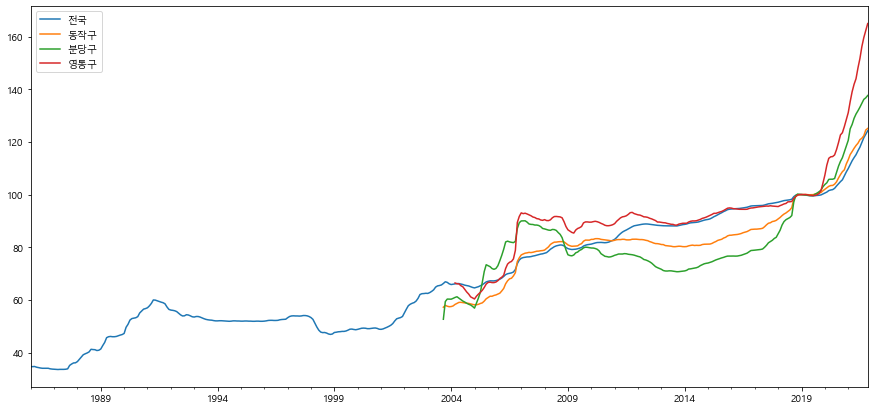

In [23]:
plt.figure(figsize=(15,7))
new_data['전국']['전국'].plot(legend='전국')
new_data['서울']['동작구'].plot(legend='동작구')
new_data['성남']['분당구'].plot(legend='분당구')
new_data['수원']['영통구'].plot(legend='영통구')
plt.show()

<Figure size 720x1080 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, '전국')

<AxesSubplot:>

Text(0.5, 1.0, '서울')

<AxesSubplot:>

Text(0.5, 1.0, '대구')

<AxesSubplot:>

Text(0.5, 1.0, '부산')

<AxesSubplot:>

Text(0.5, 1.0, '평택')

<AxesSubplot:>

Text(0.5, 1.0, '성남')

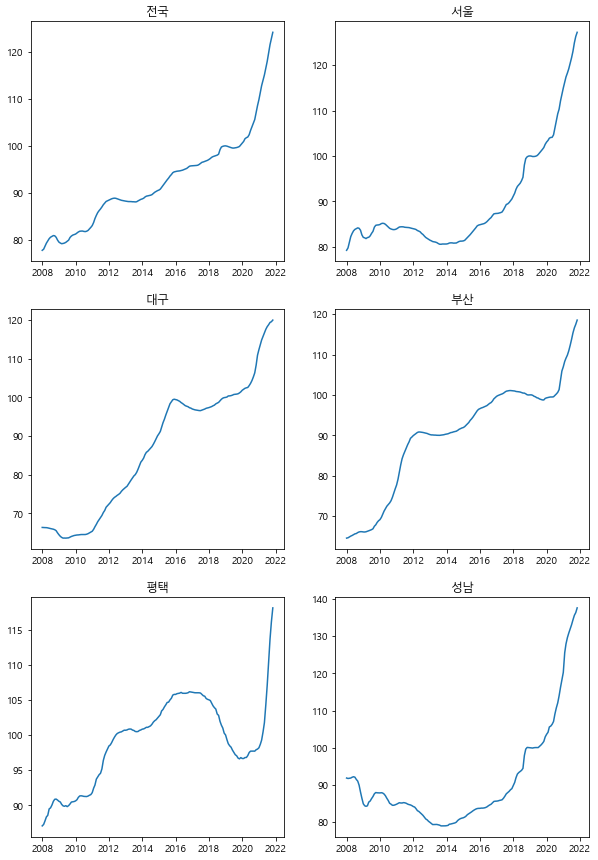

In [26]:
spots='전국 서울 대구 부산 평택 성남'
start_date='2008-1'
spot_list=spots.split(' ')
num_row=int((len(spot_list)-1)/2)+1

plt.figure(figsize=(10, num_row*5))
for i, spot in enumerate(spot_list):
    plt.subplot(num_row, 2, i+1)
    plt.title(spot)
    plt.plot(new_data[spot][spot][start_date:])
    
plt.show()

<Figure size 720x2160 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, '서울')

<ipython-input-55-1ae0883e2b5d>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,1,1)


<AxesSubplot:title={'center':'서울'}>

Text(0.5, 1.0, '서울,마포구')

<AxesSubplot:title={'center':'서울,마포구'}>

Text(0.5, 1.0, '서울,강남구')

<AxesSubplot:title={'center':'서울,강남구'}>

Text(0.5, 1.0, '부산')

<AxesSubplot:title={'center':'부산'}>

Text(0.5, 1.0, '경기')

<AxesSubplot:title={'center':'경기'}>

Text(0.5, 1.0, '수원,장안구')

<AxesSubplot:title={'center':'수원,장안구'}>

Text(0.5, 1.0, '수원,영통구')

<AxesSubplot:title={'center':'수원,영통구'}>

Text(0.5, 1.0, '수원,권선구')

<AxesSubplot:title={'center':'수원,권선구'}>

Text(0.5, 1.0, '수원,팔달구')

<AxesSubplot:title={'center':'수원,팔달구'}>

Text(0.5, 1.0, '평택')

<AxesSubplot:title={'center':'평택'}>

Text(0.5, 1.0, '평택')

(70.0, 150.0)

<Figure size 720x2160 with 0 Axes>

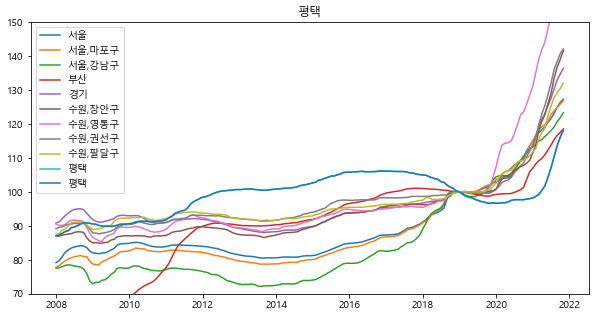

In [55]:
spots='서울 서울,마포구 서울,강남구 부산 경기 수원,장안구 수원,영통구 수원,권선구 수원,팔달구 평택 평택'
start_date='2008-1'
spot_list=spots.split(' ')
num_row=int((len(spot_list)-1)/2)+1

plt.figure(figsize=(10, num_row*5))
plt.figure(figsize=(10,  5))
for i, spot in enumerate(spot_list):
    #plt.subplot(num_row, 2, i+1)
    plt.subplot(1,1,1)
    plt.title(spot)
    if ',' in spot:
        si, gu = spot.split(',')
    else:
        si=gu=spot
        
    plt.plot(new_data[si][gu][start_date:])
    plt.legend(spot_list)

    
plt.ylim(70,150)   
plt.show()

<h3>날짜 사이의 부동산 가격 증감율 계산하기

In [72]:
new_data
diff=(new_data.loc['2018-01-01'] - new_data.loc['2016-01-01']) / new_data.loc['2016-01-01'] * 100
diff.sort_values()

전국          서울                                      \
                    전국          서울    강북\n14개구         강북구         광진구   
1986-01-01   34.656084   30.043817   41.939986        None        None   
1986-02-01   34.656084   30.043817    41.88915        None        None   
1986-03-01   34.707965   30.002377    41.88915        None        None   
1986-04-01   34.448563   29.836618   41.736641        None        None   
1986-05-01   34.292922   29.587979   41.279114        None        None   
1986-06-01   34.137281   29.380781   41.279114        None        None   
1986-07-01    34.03352   29.297901   41.228277        None        None   
1986-08-01    34.03352   29.297901   41.228277        None        None   
1986-09-01    34.03352   29.297901   41.228277        None        None   
1986-10-01    34.03352   29.173582   41.075768        None        None   
1986-11-01   33.825998   28.924943   41.024932        None        None   
1986-12-01   33.722238   28.717745    40.77075        None        None   
1987-01-01   33.670357   28.717745   40.872423        None        None   
1987-02-01   33.618477   28.634865   40.821587        None        None   
1987-03-01   33.566597   28.469106   40.516569        None        None   
...                ...         ...         ...         ...         ...   
2020-09-01  104.909091  109.284336  109.474564  109.676171  107.904121   
2020-10-01  105.611182  110.302671   110.44785  109.958661  108.133845   
2020-11-01  107.124589  112.138734  112.300272  111.120695  109.123859   
2020-12-01  108.585812   113.53198  113.655652  111.726695  110.692471   
2021-01-01  109.878119  114.974154  115.013597  112.210138  111.272511   
2021-02-01  111.374614  116.290216  116.360124  112.752599  111.733825   
2021-03-01  112.842462  117.410833  117.708462  114.219958  112.234677   
2021-04-01  114.039045  118.275864  118.807332  116.472746  112.887055   
2021-05-01  115.132794  119.218867  119.864269  118.445754  113.679492   
2021-06-01   116.64155  120.421342  120.898768  117.724417  113.562016   
2021-07-01  118.002219  121.630685  122.209685  118.678543  114.235722   
2021-08-01  119.767553  123.082728  123.841216  119.944029  115.112996   
2021-09-01  121.591133  124.952358  126.037762  124.599371  116.192987   
2021-10-01  122.864781  126.325135  127.307387  129.423898  116.297279   
2021-11-01  124.221092  127.251681   128.10705  129.673769  116.876711   

                                                                        \
                   노원구         도봉구        동대문구         마포구        서대문구   
1986-01-01        None        None        None        None        None   
1986-02-01        None        None        None        None        None   
1986-03-01        None        None        None        None        None   
1986-04-01        None        None        None        None        None   
1986-05-01        None        None        None        None        None   
1986-06-01        None        None        None        None        None   
1986-07-01        None        None        None        None        None   
1986-08-01        None        None        None        None        None   
1986-09-01        None        None        None        None        None   
1986-10-01        None        None        None        None        None   
1986-11-01        None        None        None        None        None   
1986-12-01        None        None        None        None        None   
1987-01-01        None        None        None        None        None   
1987-02-01        None        None        None        None        None   
1987-03-01        None        None        None        None        None   
...                ...         ...         ...         ...         ...   
2020-09-01  115.656594    107.7049    108.8637  108.965952  109.271665   
2020-10-01  116.878815  108.473046   110.66279  109.593482  110.100572   
2020-11-01  119.786943  111.291171  112.494931  111.447154  112.122691   
2020-12-01  121.923625 

창원   성산구   -10.588477
구미   구미     -7.297924
창원   의창구    -6.394714
     창원     -5.338448
포항   북구     -5.082983
창원   진해구    -4.975431
경북   경북     -4.957619
울산   동구     -4.594578
청주   상당구    -4.476693
울산   북구     -4.458143
천안   서북구    -4.360101
경산   경산     -4.151697
대구   달서구    -3.951737
천안   천안     -3.688726
청주   서원구    -3.678128
              ...    
양주   양주           NaN
동두천  동두천          NaN
광주   광주           NaN
춘천   강릉           NaN
제천   제천           NaN
계룡   계룡           NaN
당진   당진           NaN
서산   서산           NaN
광양   광양           NaN
안동   안동           NaN
김천   김천           NaN
양산   양산           NaN
거제   거제           NaN
통영   통영           NaN
제주도  제주도          NaN
Length: 186, dtype: object

In [80]:
diff= ( (new_data.loc['2021-11-01'] - new_data.loc['2019-01-01']) / new_data.loc['2019-01-01'] * 100 ) .dropna()
print('하위 10개')
diff.sort_values()[:10]
print('상위 10개')
diff.sort_values(ascending=False)[:10]

하위 10개


목포  목포      -3.411773
부산  중구       0.402449
창원  마산합포구    1.069986
경산  경산       1.601379
부산  서구       1.671652
창원  마산회원구     1.92442
논산  논산        1.92517
진주  진주       2.724364
부산  동구       3.933051
익산  익산       4.843913
dtype: object

상위 10개


수원  영통구     64.943317
인천  연수구     53.689244
대전  서구      49.801476
고양  덕양구      49.72774
서울  노원구      48.03561
수원  수원      46.842014
성남  중원구     46.342492
부산  해운대구    45.783537
세종  세종      45.057961
군포  군포      44.788878
dtype: object

<h2>부동산 가격지수 증감률을 시각화하기

Text(0.5, 1.0, '2019.01~2021.11 가격 변화율 최하위 20')

([<matplotlib.axis.YTick at 0x1e89170a100>,
 [Text(0, 0, "('목포', '목포')"),
  Text(0, 1, "('부산', '중구')"),
  Text(0, 2, "('창원', '마산합포구')"),
  Text(0, 3, "('경산', '경산')"),
  Text(0, 4, "('부산', '서구')"),
  Text(0, 5, "('창원', '마산회원구')"),
  Text(0, 6, "('논산', '논산')"),
  Text(0, 7, "('진주', '진주')"),
  Text(0, 8, "('부산', '동구')"),
  Text(0, 9, "('익산', '익산')"),
  Text(0, 10, "('제주도', '제주/\\n서귀포')"),
  Text(0, 11, "('울산', '동구')"),
  Text(0, 12, "('창원', '의창구')"),
  Text(0, 13, "('울산', '울주군')"),
  Text(0, 14, "('춘천', '춘천')"),
  Text(0, 15, "('청주', '상당구')"),
  Text(0, 16, "('전주', '완산구')"),
  Text(0, 17, "('전남', '전남')"),
  Text(0, 18, "('전주', '전주')"),
  Text(0, 19, "('전주', '덕진구')")])

Text(-3.241184681828728, 0.0, '-3.41%')

Text(0.3823264643137939, 1.0, '0.4%')

Text(1.0164862706227935, 2.0, '1.07%')

Text(1.5213102550347, 3.0, '1.6%')

Text(1.5880696780478978, 4.0, '1.67%')

Text(1.8281991715025476, 5.0, '1.92%')

Text(1.8289114457910982, 6.0, '1.93%')

Text(2.588145630877199, 7.0, '2.72%')

Text(3.7363985194393057, 8.0, '3.93%')

Text(4.6017169464666035, 9.0, '4.84%')

Text(4.799619224446244, 10.0, '5.05%')

Text(5.042265265869803, 11.0, '5.31%')

Text(5.345583521102353, 12.0, '5.63%')

Text(5.452656807143897, 13.0, '5.74%')

Text(5.571305780546251, 14.0, '5.86%')

Text(5.623684603388647, 15.0, '5.92%')

Text(5.754728949794202, 16.0, '6.06%')

Text(5.820166199451748, 17.0, '6.13%')

Text(5.854726421637356, 18.0, '6.16%')

Text(5.970440436538748, 19.0, '6.28%')

Text(0.5, 1.0, '2019.01~2021.11 가격 변화율 최상위 20')

([<matplotlib.axis.YTick at 0x1e89176fa60>,
 [Text(0, 0, "('고양', '일산동구')"),
  Text(0, 1, "('안양', '안양')"),
  Text(0, 2, "('수원', '장안구')"),
  Text(0, 3, "('수원', '권선구')"),
  Text(0, 4, "('대전', '유성구')"),
  Text(0, 5, "('안산', '단원구')"),
  Text(0, 6, "('고양', '고양')"),
  Text(0, 7, "('남양주', '남양주')"),
  Text(0, 8, "('용인', '수지구')"),
  Text(0, 9, "('안양', '동안구')"),
  Text(0, 10, "('군포', '군포')"),
  Text(0, 11, "('세종', '세종')"),
  Text(0, 12, "('부산', '해운대구')"),
  Text(0, 13, "('성남', '중원구')"),
  Text(0, 14, "('수원', '수원')"),
  Text(0, 15, "('서울', '노원구')"),
  Text(0, 16, "('고양', '덕양구')"),
  Text(0, 17, "('대전', '서구')"),
  Text(0, 18, "('인천', '연수구')"),
  Text(0, 19, "('수원', '영통구')")])

Text(37.42538899108666, 0.0, '39.4%')

Text(37.623495443643904, 1.0, '39.6%')

Text(39.48297996718284, 2.0, '41.56%')

Text(39.97202367878496, 3.0, '42.08%')

Text(40.22086814408015, 4.0, '42.34%')

Text(41.17674671427296, 5.0, '43.34%')

Text(41.50578612179704, 6.0, '43.69%')

Text(41.8626352077048, 7.0, '44.07%')

Text(41.92492985123201, 8.0, '44.13%')

Text(42.038957989416886, 9.0, '44.25%')

Text(42.54943432206915, 10.0, '44.79%')

Text(42.805063067708794, 11.0, '45.06%')

Text(43.4943605412993, 12.0, '45.78%')

Text(44.025367513311245, 13.0, '46.34%')

Text(44.49991375906564, 14.0, '46.84%')

Text(45.63382932581656, 15.0, '48.04%')

Text(47.24135269308824, 16.0, '49.73%')

Text(47.31140204857759, 17.0, '49.8%')

Text(51.00478210231659, 18.0, '53.69%')

Text(61.696150825950234, 19.0, '64.94%')

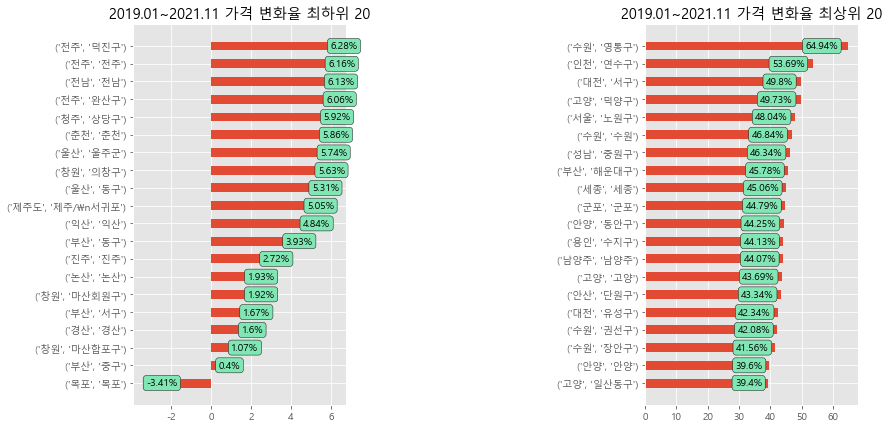

In [84]:
import numpy as np
from matplotlib import style
style.use('ggplot')

fig=plt.figure(figsize=(13,7))
ind=np.arange(20)

ax =fig.add_subplot(1,3,1)
plt.title('2019.01~2021.11 가격 변화율 최하위 20')
rects=plt.barh(ind, diff.sort_values()[:20].values, align='center', height=0.5)
plt.yticks(ind, diff.sort_values()[:20].index)
for i, rect in enumerate(rects):
    ax.text(0.95*rect.get_width(),
    rect.get_y() + rect.get_height() / 2.0,
    str(round(diff.sort_values()[:20].values[i], 2)) + '%',
    ha='left', va='center', bbox=dict(boxstyle='round', fc=(0.5, 0.9, 0.7),
                                      ec='0.1'))
    
ax2=fig.add_subplot(1,3,3)
plt.title('2019.01~2021.11 가격 변화율 최상위 20')
rects2=plt.barh(ind, diff.sort_values()[-20:].values, align='center', height=0.5)
plt.yticks(ind, diff.sort_values()[-20:].index)

for i, rect in enumerate(rects2):
    ax2.text(0.95 * rect.get_width(),
            rect.get_y()+rect.get_height() / 2.0,
            str(round(diff.sort_values()[-20:].values[i],2)) + '%',
            ha='right', va='center', bbox=dict(boxstyle='round', fc=(0.5, 0.9, 0.7), ec='0.1'))
    
plt.show()